In [1]:
import sys, os
sys.path.append(os.path.abspath("../"))

#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### Code to get external code files
####
#### This is necessary because the notebook is in a folder
#### --------------------------------------------------------

In [2]:
##### +++++++++++++++++++++++++++++++++++++++++++++++++++++++
##### Generate Baseline
##### --------------------------------------------------------
from keras.models import load_model
from src_code.eval import evaluate_model

model_path = "../saved_models/behav_model.keras"

if os.path.exists(model_path):
    print('Loading the Saved Model!')
    model = load_model(model_path)
    evaluate_model(model)

Loading the Saved Model!
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [3]:
from src_code.generate_data import get_train_test_data


#generate the data
X_train, X_test, y_train, y_test = get_train_test_data()

In [4]:
#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### SEE THE TRAINING ARRAY FOR ONE INDEX
#### ----------------------------------------------------
import numpy as np

arr = [np.round(x,2).tolist() for x in X_train[0]]
len(arr)


50

In [5]:
#### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### CREATE A FUNCTION FOR MODEL COMPILATION AND FIT
def compile_and_fit(model_name, loss_name: str, epoch_size: int, batch: int):
    #generate the data 
    X_train, X_test, y_train, y_test = get_train_test_data()

    model_name.compile(loss=loss_name, optimizer='adam')
    model_name_fit = model_name.fit(X_train, y_train, epochs = epoch_size, batch_size = batch)

    return model_name_fit, model_name

In [6]:
#### +++++++++++++++++++++++++++++++++++++++++++++++
#### PLOT THE LOSS DURING TRAINING
#### -----------------------------------------------
import matplotlib.pyplot as plt

def plot_loss_in_training(model_fit):
    plt.figure(figsize=(5, 5))
    plt.plot(model_fit.history['loss'], marker='o')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

In [7]:
import keras
from keras import Sequential

### ++++++++++++++++++++++++++++++++++++++++++++++
### DESCRIPTION OF PARAMETERS
###
### The final layer in the model has 5 neurons, because
###     we are seeking to predict 5 behaviors:
###         1. Cruise
###         2. Accelerate
###         3. Brake
###         4. Turn right
###         5. Turn left
###
### The size of the input is (50, 6); 6 characteristics
###     characteristics = ['speed', 'accel', 'yaw_rate', 'steering', 'throttle', 'brake']
###     each having a sequence of 50

experimental_model = model = Sequential([
        keras.layers.Input(shape=((50, 6))),
        keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
        keras.layers.MaxPooling1D(4),
        keras.layers.Dropout(0.3),
        keras.layers.LSTM(64),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(5, activation='softmax')
    ])

experimental_model_fit, experimental_model = compile_and_fit(experimental_model, 'sparse_categorical_crossentropy', epoch_size=20, batch=16)
experimental_model.save("../saved_models/best_model.keras")


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2558
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4603
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2777
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2722
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1843
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1400
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0656
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0300
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075
Epoch 16/20
25/25 ━

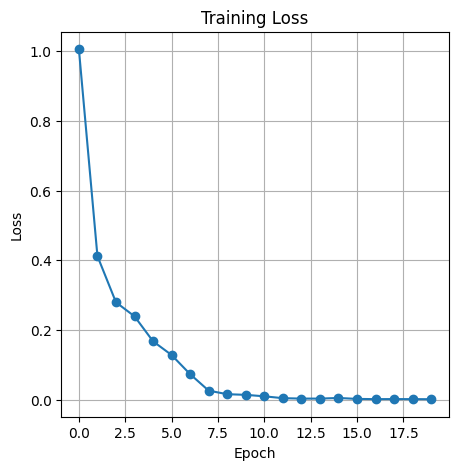

In [8]:
plot_loss_in_training(experimental_model_fit)

In [9]:
result = evaluate_model(experimental_model)
for k, v in result.items():
    print(f'{k} is: \n\n {v}\n')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Confusion Matrix is: 

 [[17  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 19]]

Classification Report is: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        19

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Loss is: 

 0.00036825836286880076

